# Reinforcement Learning Final Project 

Welcome to your Reinforcement Learning project focused on developing an RL agent capable of playing chess at a strategic level. Chess has long been considered a benchmark for measuring AI capabilities, and this project aims to leverage the power of RL to create an intelligent agent that can make optimal decisions in complex chess positions. By combining the principles of reinforcement learning with the rich strategic domain of chess, you will explore new approaches to create the most effective chess player.

## Project Objectives:

* Train an RL agent to play chess: The primary objective of this project is to develop an RL agent that can play chess at a high level of proficiency. The agent should be capable of evaluating chess positions and making strategic decisions.

* Optimize decision-making using RL algorithms: Explore different RL algorithms, as seen in class, to train the agent. Compare and analise their effectiveness in learning and decision-making capabilities in the context of chess.

* Use a challenging chess environment: Use a comprehensive environment for the agent to interact with, representing the rules and dynamics of chess. This environment will provide a realistic and challenging setting for the agent's training and evaluation.

* Evaluate and benchmark performance: Assess the performance of the RL agent against different benchmarks from existing chess engines. You will compare your agent's performance to established chess engines to measure progress and identify areas for improvement.


### Extra Objectives:

* Investigate transfer learning and generalization: Explore techniques for transfer learning to leverage knowledge acquired in related domains or from pre-training on large chess datasets. Investigate the agent's ability to generalize its knowledge.

* Enhance interpretability and analysis: Develop methods to analise the agent's decision-making process and provide insights into its strategic thinking. Investigate techniques to visualize the agent's evaluation of chess positions and understand its reasoning behind specific moves.

## Let's Play Chess! 

As you know [Chess](https://en.wikipedia.org/wiki/Chess) is a board game for two players, called White and Black, each controlling an army of chess pieces in their color, with the objective to checkmate the opponent's king.

Chess is an abstract strategy game that involves no hidden information and no use of dice or cards. It is played on a chessboard with 64 squares arranged in an eight-by-eight grid. At the start, each player controls sixteen pieces: one king, one queen, two rooks, two bishops, two knights, and eight pawns. White moves first, followed by Black. Checkmating the opponent's king involves putting the king under immediate attack (in "check") whereby there is no way for it to escape.


![](Images/CHESS_MOVES.PNG)

* The king moves one square in any direction. There is also a special move called castling that involves moving the king and a rook. The king is the most valuable piece — attacks on the king must be immediately countered, and if this is impossible, the game is immediately lost.
* A rook can move any number of squares along a rank or file, but cannot leap over other pieces. Along with the king, a rook is involved during the king's castling move.
* A bishop can move any number of squares diagonally, but cannot leap over other pieces.
* A queen combines the power of a rook and bishop and can move any number of squares along a rank, file, or diagonal, but cannot leap over other pieces.
* A knight moves to any of the closest squares that are not on the same rank, file, or diagonal. (Thus the move forms an "L"-shape: two squares vertically and one square horizontally, or two squares horizontally and one square vertically.) The knight is the only piece that can leap over other pieces.
* A pawn can move forward to the unoccupied square immediately in front of it on the same file, or on its first move it can advance two squares along the same file, provided both squares are unoccupied (black dots in the diagram). A pawn can capture an opponent's piece on a square diagonally in front of it by moving to that square (black crosses). It cannot capture a piece while advancing along the same file. A pawn has two special moves: the en passant capture and promotion.

## The [Environment](https://github.com/iamlucaswolf/gym-chess)

The environment gym-chess provides OpenAI Gym environments for the game of Chess. It comes with an implementation of the board and move encoding used in AlphaZero. 

Please install it using the command: 

`pip install gym-chess`

In [11]:
import chess
import gym
import gym_chess
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import pickle

### A Two player's game

As you know chess is played by two players, as such the gym-chess environment gives you access to both players actions in a sequential matter.

In [12]:
def WHITE_PLAYER_POLICY(env, state):
    legal_actions = env.legal_actions
    action = np.random.choice(legal_actions)

    return action

def BLACK_PLAYER_POLICY(env, state):
    legal_actions = env.legal_actions
    action = np.random.choice(legal_actions)

    return action

In [13]:
env = gym.make(
    "ChessAlphaZero-v0"
)  # We will use Alpha Zero's numenclature for the actions encodings

state = env.reset()
done = False
counter = 0  # Since each step represents a play in a chess game we are going to store the number of steps associated to the episode/game

while not done:
    if (
        counter % 2 == 0
    ):  # If the step number is pair, this means that it is the WHITE player's turn
        action = WHITE_PLAYER_POLICY(env, state)
        next_state, reward, done, info = env.step(action)

    else:  # If the step number is not pair, aka odd, this means that it is the BLACK player's turn
        action = BLACK_PLAYER_POLICY(env, state)
        next_state, reward, done, info = env.step(action)

    counter += 1

print(reward)

env.close()

0.0


#### The agent receives a reward of +1 when the white player makes a winning move, and a reward of -1 when the black player makes a winning move. 

All other rewards are zero.

### Evaluationg your agent with [Stockfish](https://github.com/zhelyabuzhsky/stockfish)

In order to have a good enough idea that our agent is actually playing well we need a benchmarkable opponent.

As such we need to install stockfish a free and open-source chess engine. Stockfish has consistently ranked first or near the top of most chess-engine rating lists and, as of April 2023, is the strongest CPU chess engine in the world.

`pip install stockfish`


In [14]:
from stockfish import Stockfish

StockFish has a python api as seen above, nevertheless the engine still needs to be downloaded [here](https://stockfishchess.org/download/) and used in the path.

NOTE: You were given an engine already in moodle, nevertheless different computer systems (Windows, Mac, Ubuntu) might require other Stockfish engines.

In [15]:
Stockfish_path = r"C:\Users\rfdns\Desktop\Repos\ChessRL23\stockfish_15.1_win_x64_avx2\stockfish-windows-2022-x86-64-avx2.exe"

The functions bellow generate episodes/games for a WHITE or BLACK Pieces Scenario respectively. We store the outcome of the episode (win/draw/loss) and the number of steps taken.

#### Notice how the AGENT_POLICY function is used it recieves as inputs the env and the current state.
`action = AGENT_POLICY(env, state)`

In [16]:
def generate_WHITE_scenario(Stockfish_path, AGENT_POLICY):
    env = gym.make(
        "ChessAlphaZero-v0"
    )  # We will use Alpha Zero's numenclature for the actions encodings
    stockfish = Stockfish(Stockfish_path)
    stockfish.set_elo_rating(
        100
    )  # Default "skill" level is 1350, higher will increase the skill of stockfish "player". See more at https://en.wikipedia.org/wiki/Elo_rating_system

    state = env.reset()
    done = False
    counter = 0  # Since each step represents a play in a chess game we are going to store the number of steps associated to the episode/game

    while not done:
        if (
            counter % 2 == 0
        ):  # If the step number is pair, this means that it is the WHITE player's turn
            action = AGENT_POLICY(env, state)
            decoded_action = str(env.decode(action))
            stockfish.make_moves_from_current_position([decoded_action])
            next_state, reward, done, info = env.step(action)

        else:  # If the step number is not pair, aka odd, this means that it is the BLACK player's turn
            decoded_action = stockfish.get_best_move()
            action = env.encode(chess.Move.from_uci(decoded_action))
            stockfish.make_moves_from_current_position([decoded_action])
            next_state, reward, done, info = env.step(action)

        counter += 1
        state = next_state

    env.close()

    return reward, np.ceil(counter / 2), state


def generate_BLACK_scenario(Stockfish_path, AGENT_POLICY):
    env = gym.make(
        "ChessAlphaZero-v0"
    )  # We will use Alpha Zero's numenclature for the actions encodings
    stockfish = Stockfish(Stockfish_path)
    stockfish.set_elo_rating(
        100
    )  # Default "skill" level is 1350, higher will increase the skill of stockfish "player". See more at https://en.wikipedia.org/wiki/Elo_rating_system

    state = env.reset()
    done = False
    counter = 0  # Since each step represents a play in a chess game we are going to store the number of steps associated to the episode/game

    while not done:
        if (
            counter % 2 == 1
        ):  # If the step number is not pair, aka odd, this means that it is the BLACK player's turn
            action = AGENT_POLICY(env, state)
            decoded_action = str(env.decode(action))
            stockfish.make_moves_from_current_position([decoded_action])
            next_state, reward, done, info = env.step(action)

        else:  # If the step number is pair, this means that it is the WHITE player's turn
            decoded_action = stockfish.get_best_move()
            action = env.encode(chess.Move.from_uci(decoded_action))
            stockfish.make_moves_from_current_position([decoded_action])
            next_state, reward, done, info = env.step(action)

        counter += 1
        state = next_state
    env.close()

    return reward, np.ceil(counter / 2), state

In the function bellow a visualization is produced from the bechmarks made.

In [17]:
def AGENT_EVALUATION(Stockfish_path, AGENT_POLICY, n_evaluations=100):
    results_list = []

    for evaluation_number in tqdm(range(n_evaluations)):
        generate_episode = generate_WHITE_scenario

        reward, n_steps = generate_episode(Stockfish_path, AGENT_POLICY)

        if reward == 1:
            result = "VICTORY"
        elif reward == 0:
            result = "DRAW"
        else:
            result = "LOSS"

        results_list.append(["WHITE", result, n_steps])

        generate_episode = generate_BLACK_scenario

        reward, n_steps = generate_episode(Stockfish_path, AGENT_POLICY)

        if reward == -1:
            result = "VICTORY"
        elif reward == 0:
            result = "DRAW"
        else:
            result = "LOSS"

        results_list.append(["BLACK", result, n_steps])

    df = pd.DataFrame(
        results_list, columns=["AGENT COLOR", "OUTCOME", "N STEPS"]
    ).astype("int", errors="ignore")

    plt.style.use("fivethirtyeight")

    results_group = (
        df.groupby(["AGENT COLOR", "OUTCOME"])
        .count()
        .rename(columns={"N STEPS": "GAMES"})
    )

    n_games = results_group.sum()[0]

    results_group = (2 * 100 * results_group / (n_games)).astype("int")

    viz_df = (
        results_group.reset_index()
        .pivot_table(index="AGENT COLOR", columns="OUTCOME", values="GAMES")
        .fillna(0)
    )

    viz_df.plot(kind="barh", stacked=True)

    plt.xlabel("Percentage")
    plt.title(f"EVALUATION RESULTS FOR {n_games} GAMES")

    plt.show()

    return df

In [23]:
df = AGENT_EVALUATION(Stockfish_path, WHITE_PLAYER_POLICY, n_evaluations=5)

  0%|          | 0/5 [00:00<?, ?it/s]

IndexError: too many indices for array: array is 3-dimensional, but 4 were indexed

In [9]:
df.head(5)

,AGENT COLOR,OUTCOME,N STEPS
0,WHITE,LOSS,17
1,BLACK,LOSS,27
2,WHITE,LOSS,19
3,BLACK,LOSS,12
4,WHITE,LOSS,21


# Ready to Play Chess?

In [52]:
import chess
import copy
import gym
import gym_chess
from typing import Optional
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import gym
import numpy as np
import random

white_pieces={0: "pawn", 1: "horse", 2: "knight", 3: "rook", 4: "queen", 5: "king"} #PARA TODOS
black_pieces={6: "pawn", 7: "horse", 8: "knight", 9: "rook", 10: "queen", 11: "king"} #PARA TODOS

In [53]:
def AGENT_EVALUATION(Stockfish_path, AGENT_POLICY, n_evaluations=100):
    results_list = []

    for evaluation_number in tqdm(range(n_evaluations)):
        print(evaluation_number)
        generate_episode = generate_WHITE_scenario
        reward, n_steps, last_state = generate_episode(Stockfish_path, AGENT_POLICY)

        if reward == 1:
            result = "VICTORY"
        elif reward == 0:
            result = "DRAW"
        else:
            result = "LOSS"

        agent_pieces = last_state[:, :,6:13].sum()
        opponent_pieces = last_state[:, :,:6].sum()
        remaining_pieces=[]
        for piece in white_pieces: #PARA TODOS
            remaining_pieces.append(last_state[:,:,piece].sum()) #PARA TODOS: podem ter de ajustar para [:, :,piece]
        results_list.append(["WHITE", result, n_steps, agent_pieces, opponent_pieces, *remaining_pieces]) #PARA TODOS
        

        generate_episode = generate_BLACK_scenario
        reward, n_steps, last_state = generate_episode(Stockfish_path, AGENT_POLICY)

        if reward == -1:
            result = "VICTORY"
        elif reward == 0:
            result = "DRAW"
        else:
            result = "LOSS"

        agent_pieces = last_state[:, :,6:13].sum() 
        opponent_pieces = last_state[:, :,:6].sum()
        remaining_pieces=[] #PARA TODOS
        for piece in black_pieces: #PARA TODOS
            remaining_pieces.append(last_state[:,:,piece].sum()) #PARA TODOS: podem ter de ajustar para [:, :,piece]
        results_list.append(["BLACK", result, n_steps, agent_pieces, opponent_pieces, *remaining_pieces]) #PARA TODOS

    df = pd.DataFrame(
        results_list, columns=["AGENT COLOR", "OUTCOME", "N STEPS", "AGENT PIECES", "OPPONENT PIECES", "pawn", "horse", "knight", "rook", "queen", "king"]
    ).astype("int", errors="ignore")

    plt.style.use("fivethirtyeight")

    results_group = (
        df.groupby(["AGENT COLOR", "OUTCOME"])
        .count()
        .rename(columns={"N STEPS": "GAMES"})
    )

    n_games = results_group.sum()[0]

    results_group = (2 * 100 * results_group / (n_games)).astype("int")

    viz_df = (
        results_group.reset_index()
        .pivot_table(index="AGENT COLOR", columns="OUTCOME", values="GAMES")
        .fillna(0)
    )

    viz_df.plot(kind="barh", stacked=True)

    plt.xlabel("Percentage")
    plt.title(f"EVALUATION RESULTS FOR {n_games} GAMES")

    plt.show()

    return df


  0%|          | 0/100 [00:00<?, ?it/s]

0
1095
950
1023
877
414
928
129
500
1022
1606
2197
2847
658
307
196
440
804
261
934
153
1190
810
1
876
229
1023
730
500
950
334
933
373
1668
553
268
452
2190
657
803
772
1714
584
803
1023
156
130
949
261
1095
657
731
1898
0
1387
160
866
600
1954
803
1533
219
831
219
876
852
1349
678
1416
188
2
803
153
810
1096
658
731
1469
220
1402
341
1585
876
949
1023
2263
810
1495
2847
810
1502
658
196
1825
804
950
130
261
3
877
418
1022
585
306
1752
228
731
804
154
372
657
501
1595
1468
1050
2812
2336
3
136
658
1227
730
4
731
1095
270
1898
1768
2013
511
1905
1022
584
658
950
136
1224
804
584
0
1096
512
1722
1022
342
877
1606
233
494
1740
1010
5
877
804
219
949
416
1933
813
1251
299
991
1096
585
129
1
154
904
500
334
939
1095
584
657
195
804
1679
730
261
1168
706
160
1175
219
831
511
261
2263
876
1833
415
1409
494
1023
6
1096
804
2263
511
154
1496
1123
155
130
512
341
730
824
262
950
334
2847
1022
877
584
0
500
233
934
299
501
88
998
221
1321
415
612
877
226
1023
883
1547
294
731
657
1634
1029
7
731

160
341
845
7
1314
744
852
658
136
949
195
301
2298
1609
803
877
14
414
115
233
14
299
984
911
341
824
494
306
56
658
1096
731
270
1825
2263
512
1752
334
195
1723
233
998
2409
666
136
1227
501
334
1022
731
657
494
1606
553
584
1168
876
1742
2837
373
439
949
268
737
57
876
1023
500
585
1460
553
2190
439
1651
0
804
1315
219
852
938
414
1370
130
2611
859
897
154
334
226
925
1401
949
301
2309
1095
129
1898
658
1533
195
876
418
585
730
2944
58
1022
658
372
1029
195
731
584
0
1714
949
494
876
1533
664
1349
1074
1742
261
803
2166
306
146
732
664
1322
2532
414
911
261
731
1023
268
334
584
877
2051
730
1328
59
1022
730
804
876
268
501
751
269
1290
1314
372
658
1759
136
731
950
1095
1023
803
501
1387
553
342
1596
1335
852
153
440
810
2204
658
1342
233
60
876
730
415
268
136
1095
1022
804
1606
706
334
500
233
1460
341
1971
195
1168
845
758
950
2190
146
765
584
1096
949
1023
373
1533
803
730
1321
154
299
956
1634
261
129
658
160
219
1394
1509
845
744
803
61
657
136
730
877
501
226
1241
414
195
553

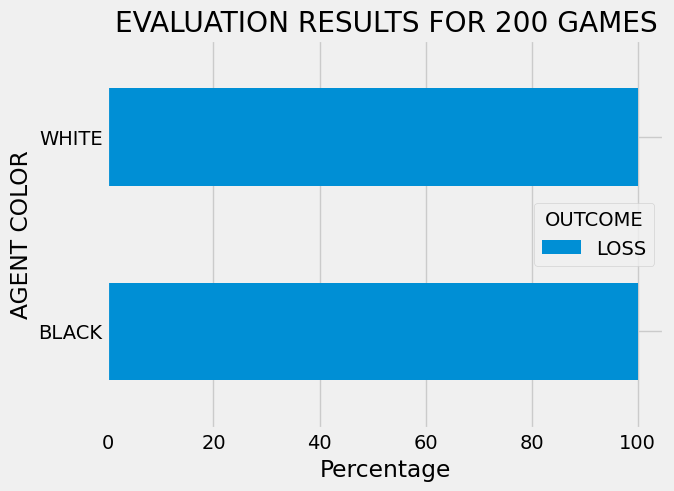

In [54]:
def traverse(node):
    while node.done:
        node = node.select_child()
        if node is None:
            return None
    return node.expand()

def rollout(node):
    current_node = node
    done = False
    while current_node is not None:
        if done:
            break

        legal_actions = list(current_node.env.legal_actions)
        action = random.choice(legal_actions)
        next_state, reward, done, info = current_node.env.step(action)
        new_node = Node(state=next_state, env=current_node.env, done=done, parent=current_node, action=action)
        current_node.children[action] = new_node
        current_node = new_node

    return reward


def backpropagate(leaf_node, reward):
    current_node = leaf_node
    while current_node is not None:
        current_node.visits += 1
        current_node.total_reward += reward
        current_node = current_node.parent

def MCTS(root, iterations):
    for _ in range(iterations):
        leaf = traverse(root)
        if leaf is not None:
            simulation_result = rollout(leaf)
            backpropagate(leaf, simulation_result)
    
    #Save the root node (and by extension, the entire MCTS tree) to a file
    
    #with open('mcts_tree.pickle', 'wb') as handle:
    #    pickle.dump(root, handle, protocol=pickle.HIGHEST_PROTOCOL)

    if len(root.children) == 0:
        return None
    return root.best_child().action


class Node:
    def __init__(self, state, env, done, parent=None, action=None):
        self.state = state
        self.env = env
        self.done = done
        self.parent = parent
        self.children = {}
        self.visits = 0
        self.total_reward = 0
        self.action = action

    def is_fully_expanded(self):
        return len(self.children) == len(self.env.legal_moves)

    def select_child(self):
        s = sorted(self.children.items(), key = lambda child: child[1].get_value())
        return s[-1][1]

    def expand(self):
        legal_actions = list(self.env.legal_moves)
        if len(legal_actions) == 0:
            return None
        move = np.random.choice(legal_actions)
        action = self.env.encode(move) 
        new_env = copy.deepcopy(self.env)
        if move in new_env.legal_moves:
            next_state, _, done, _ = new_env.step(action)  
            new_child = Node(state=next_state, env=new_env,done=done, parent=self, action=action)
            self.children[action] = new_child
            return new_child
        return None

            
    def take_action(self, action):
        new_env = self.env.clone()
        new_env.step(action)
        return Node(state=new_env.state(), env=new_env, parent=self, action=action)

    def calculate_reward(self):
        return self.env.reward()  

    def get_value(self):
        if self.visits == 0:
            return 0
        else:
            return self.total_reward / self.visits + np.sqrt(2 * np.log(self.parent.visits) / self.visits)

    def best_child(self):
        if not self.children:
            return None
        s = sorted(self.children.items(), key=lambda child: child[1].get_value())
        return s[-1][1]

def WHITE_PLAYER_POLICY(env, state):
    root = Node(state=state, env=env, done= False)
    action = MCTS(root, 50)
    print(action)
    return action

df = AGENT_EVALUATION(Stockfish_path, WHITE_PLAYER_POLICY, n_evaluations=100)

In [59]:
df.head(10)

,AGENT COLOR,OUTCOME,N STEPS,AGENT PIECES,OPPONENT PIECES,pawn,horse,knight,rook,queen,king
0,WHITE,LOSS,3,16,16,8,2,2,2,1,1
1,BLACK,LOSS,20,15,7,7,2,2,2,1,1
2,WHITE,LOSS,18,15,11,6,1,2,1,0,1
3,BLACK,LOSS,29,16,6,8,2,2,2,1,1
4,WHITE,LOSS,20,12,10,5,2,1,1,0,1
5,BLACK,LOSS,8,16,15,8,2,2,2,1,1
6,WHITE,LOSS,19,16,10,5,1,1,2,0,1
7,BLACK,LOSS,5,16,15,8,2,2,2,1,1
8,WHITE,LOSS,10,16,13,7,2,1,2,0,1
9,BLACK,LOSS,19,15,8,7,2,2,2,1,1
